# Analysis of the data from NFL Games played in the last decade

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Cleaning/Initial Analysis

In [150]:
nfl_data = pd.read_csv("nflcombine.csv")
nfl_data = nfl_data.drop(columns=['Unnamed: 0'])
nfl_data.head()

,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team,Year,Winner
0,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,158.0,98.0,2.0,21.0,295.0,174.0,121.0,4.0,-7.51,19.12,1.10,San Francisco 49ers,2019,San Francisco 49ers
1,Cincinnati Bengals,41.0,17.0,27.0,571.0,312.0,259.0,1.0,14.0,316.0,291.0,25.0,1.0,27.34,1.14,-6.64,San Francisco 49ers,2019,San Francisco 49ers
2,Pittsburgh Steelers,24.0,20.0,26.0,436.0,268.0,168.0,5.0,11.0,239.0,160.0,79.0,2.0,-3.72,10.20,0.12,San Francisco 49ers,2019,San Francisco 49ers
3,Los Angeles Rams,20.0,7.0,22.0,331.0,232.0,99.0,2.0,10.0,157.0,48.0,109.0,1.0,-3.54,25.23,-5.01,San Francisco 49ers,2019,San Francisco 49ers
4,Washington Redskins,9.0,0.0,17.0,283.0,146.0,137.0,1.0,10.0,154.0,50.0,104.0,1.0,-1.99,14.12,-0.61,San Francisco 49ers,2019,San Francisco 49ers


In [56]:
nfl_data.describe()

,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Year
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,23.225698,23.027933,20.501676,348.048045,231.830168,116.217877,1.773184,20.456983,346.213408,230.554190,115.659218,1.777654,2.345296,-2.108760,-0.030872,2020.167598
std,9.855353,9.891712,4.985858,85.873697,79.250306,51.796933,1.000535,5.036344,86.111474,79.536163,51.477706,1.007107,11.939509,12.013528,5.010320,0.980150
min,0.000000,0.000000,6.000000,105.000000,-6.000000,3.000000,1.000000,6.000000,105.000000,-6.000000,3.000000,1.000000,-35.650000,-40.690000,-17.390000,2019.000000
25%,17.000000,17.000000,17.000000,285.500000,175.000000,78.000000,1.000000,17.000000,283.000000,174.000000,78.000000,1.000000,-4.800000,-9.875000,-3.410000,2019.000000
50%,23.000000,23.000000,21.000000,354.000000,229.000000,109.000000,1.000000,21.000000,352.000000,228.000000,108.000000,1.000000,3.210000,-2.830000,-0.060000,2020.000000
75%,30.000000,30.000000,24.000000,405.500000,282.500000,145.000000,2.000000,24.000000,403.500000,280.500000,144.000000,2.000000,9.930000,5.310000,3.355000,2021.000000
max,56.000000,56.000000,36.000000,592.000000,490.000000,404.000000,7.000000,36.000000,592.000000,490.000000,404.000000,7.000000,40.690000,35.650000,17.390000,2022.000000


In [230]:
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Opp        895 non-null    object 
 1   Tm         895 non-null    float64
 2   Opp.1      895 non-null    float64
 3   1stD       895 non-null    float64
 4   TotYd      895 non-null    float64
 5   PassY      895 non-null    float64
 6   RushY      895 non-null    float64
 7   TO         895 non-null    float64
 8   1stD.1     895 non-null    float64
 9   TotYd.1    895 non-null    float64
 10  PassY.1    895 non-null    float64
 11  RushY.1    895 non-null    float64
 12  TO.1       895 non-null    float64
 13  Offense    895 non-null    float64
 14  Defense    895 non-null    float64
 15  Sp. Tms    895 non-null    float64
 16  Home_team  895 non-null    object 
 17  Year       895 non-null    int64  
 18  Winner     891 non-null    object 
dtypes: float64(15), int64(1), object(3)
memory usage: 

In [ ]:
# Combines multiple datasets into one about rookie stats for each year

def dataFrameCreation(year, pos):
    players = pd.read_csv("fullplayersdataset.csv")
    combine = pd.read_csv("combine.csv")
    rookies = players[players["rookie_year"] == year]
    rookies.rename(columns={"display_name": "player_name"}, inplace=True)
    playerStats = pd.read_csv(f"player_stats_season_{year}.csv")
    playerStats = playerStats.drop(columns=['player_name', 'player_id', "headshot_url", "recent_team", "season_type"], axis=1)
    playerStats.rename(columns={"player_display_name": "player_name"}, inplace=True)
    merged = pd.merge(rookies, playerStats, on='player_name', how='left')
    merged = merged.drop(columns=["current_team_id", "esb_id", "gsis_it_id", "uniform_number", "headshot", "smart_id"])
    merged = merged.dropna(subset=["season"])
    posD = merged[merged["position_x"] == pos]
    newPos = pd.merge(posD, combine, on="player_name", how = "left")
    newPos = newPos.dropna(subset=["shuttle"])

    return newPos


## Correlation Between Variables

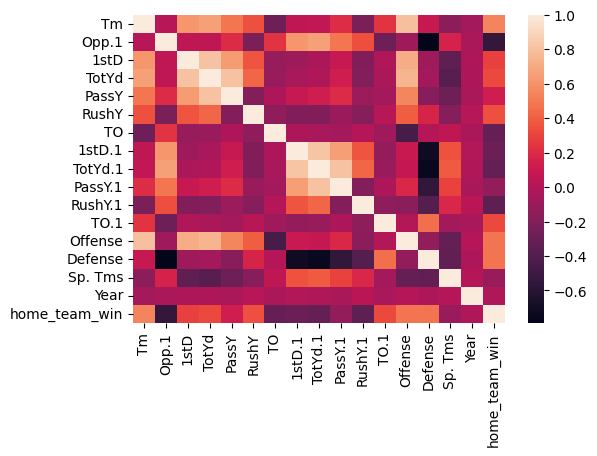

In [231]:
nfl_data["home_team_win"] = nfl_data["Home_team"] == nfl_data["Winner"]
nfl_data["home_team_win"] = nfl_data["home_team_win"].astype(int)
int_columns = nfl_data.select_dtypes(include=['int64', 'int32', 'int', 'double', 'float'])
plt.figure(figsize=(6,4))
sns.heatmap(int_columns.corr())
plt.show()

<span style="font-size:14px"> Looking at the heatmap of the correlation, it demonstrates that the ranking of the teams playing in the game matter a lot in determining who will win the game. Additionally, a game time statistic that is negatively correlated is turnovers.

## Does Home Field Advantage Exist?

**I will conduct a 1 Proportion Z-Test to determine whether the chance of the home team winning is greater than 50% or not with a significance level of 0.05**


**Ho** = The proportion of home team wins is equal to 50%

**Ha** = The proportion of home team wins is greater than 50%

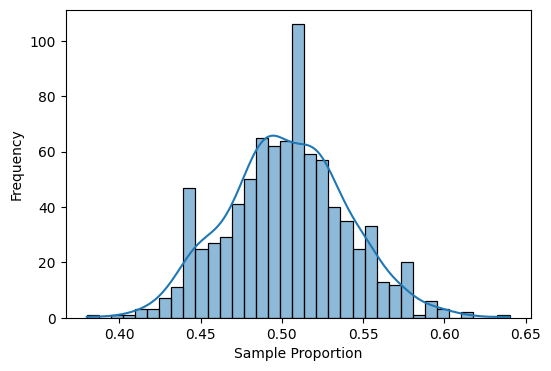

In [241]:
sample_size = 150
num_samples = 850

sample_proportions = []
for i in range(num_samples):
    sample = nfl_data.sample(n=sample_size, replace=False)
    proportion = (sample["Home_team"] == sample["Winner"]).mean()
    sample_proportions.append(proportion)

plt.figure(figsize=(6,4))
sns.histplot(sample_proportions, bins=35, kde=True)
plt.xlabel("Sample Proportion")
plt.ylabel("Frequency")
plt.show()

Since our sample size (150) is big enough for the central limit theorem to apply, we are able to conduct the test

In [233]:
from statsmodels.stats.proportion import proportions_ztest


sample = nfl_data.sample(n=sample_size, replace=False, random_state=42)
homeTeamWin = sample[sample["Home_team"] == sample["Winner"]]
zStatistic, pValue = proportions_ztest(homeTeamWin.shape[0], sample.shape[0], 0.5, alternative="larger", prop_var=False)

print(zStatistic, pValue)

1.1481067942068246 0.1254622398694959


Since the p-value is greater than α (in our example, p = 0.12 > 0.05), we fail to reject the null hypothesis. This means we do not have evidence to conclude that a home field advantage exists.

While this test isn't perfect (an injury in one game may affect another game meaning each game isn't independent), it provides an overview of the general trend in home team performance. Despite a potential violation of independence, the 1-proportion z-test offers a useful starting point for assessing whether home field advantage exists in the data. Further analysis will need to be conducted in order to eliminate confounding variables.

## Does Home Field Advantage Affect Turnovers?

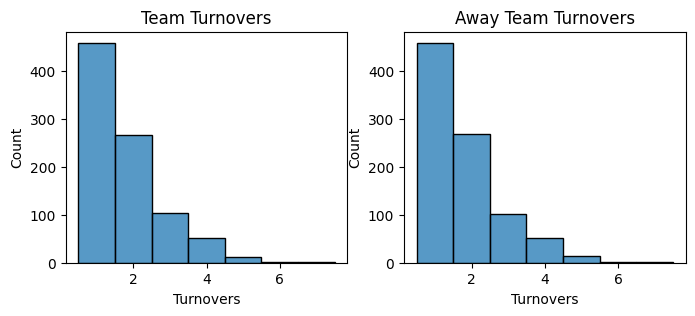

Home Team Turnovers Mean: 1.7731843575418995
Away Team Turnovers Mean: 1.7776536312849163


In [223]:
fig, axes = plt.subplots(1, 2, figsize=(8,3))
sns.histplot(nfl_data["TO"], ax=axes[0], discrete=True)
axes[0].set_title("Team Turnovers")
axes[0].set_xlabel("Turnovers")
sns.histplot(nfl_data["TO.1"], ax=axes[1], discrete=True)
axes[1].set_title("Away Team Turnovers")
axes[1].set_xlabel("Turnovers")
plt.show()


print(f"Home Team Turnovers Mean: {nfl_data["TO"].mean()}")
print(f"Away Team Turnovers Mean: {nfl_data["TO.1"].mean()}")



**A Two Sample One Sided T-Test will be used to determine whether there is a significant difference between home team turnovers and away team turnovers**

**H₀:** The mean turnovers for home teams is equal to the mean turnovers for away teams (μ₁ = μ₂)

**H₁:** The mean turnovers for home teams is less than the mean turnovers for away teams (μ₁ < μ₂)

In [234]:
turnoverSampleHome = nfl_data.sample(250, replace=False, random_state=100)
remaining = nfl_data.drop(turnoverSampleHome.index)
turnoverSampleAway = remaining.sample(250, replace=False, random_state=50)

mean1 = turnoverSampleHome["TO"].mean()
mean2 = turnoverSampleAway["TO.1"].mean()
print(mean1)
print(mean2)
tStatistic, pValue = stats.ttest_ind(turnoverSampleHome["TO"], turnoverSampleAway["TO.1"], equal_var=False, alternative="less")

print(f"T-Statistic: {tStatistic}")
print(f"p-Value: {pValue}")

1.744
1.792
T-Statistic: -0.5362257839934658
p-Value: 0.29602115758361924


The p-value returned by the t-test is 59%, which is much higher than the significance level of 5%. This means that we do not have sufficient evidence to reject the null hypothesis and say that there is a difference between home team and away team turnovers. While this test is not perfect (1 game may affect another game), it is a starting point to identify trends in what playing in a team's home-field affects.

## Does being at home versus away shift the strategy from passing to rushing or vice versa?

Two new features will be created, passing yards minus rushing yards for the home team, and passing yards minus rushing yards for the away team. 

Text(0.5, 1.0, 'Away Team Passing - Rushing Yards')

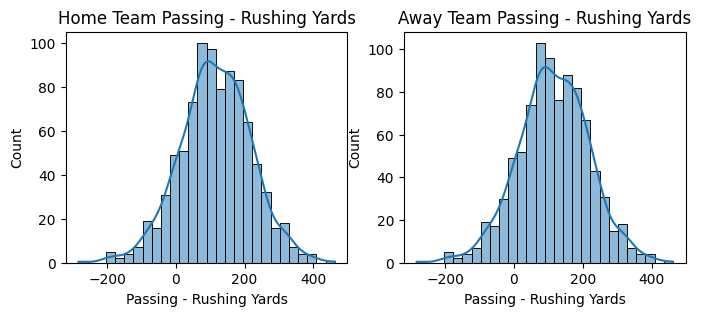

In [239]:
nfl_data["passingvrushing"] = nfl_data["PassY"] - nfl_data["RushY"]
nfl_data["passingvrushing.1"] = nfl_data["PassY.1"] - nfl_data["RushY.1"]


fig, axes = plt.subplots(1, 2, figsize=(8, 3))
sns.histplot(nfl_data["passingvrushing"], ax=axes[0], kde = True)
axes[0].set_xlabel("Passing - Rushing Yards")
axes[0].set_title("Home Team Passing - Rushing Yards")
sns.histplot(nfl_data["passingvrushing.1"], ax=axes[1], kde = True)
axes[1].set_xlabel("Passing - Rushing Yards")
axes[1].set_title("Away Team Passing - Rushing Yards")




**A Two Sample Two Sided T-Test will be used to determine whether there is a significant difference between the tendency to pass versus rush for home teams and away teams**

**Ho:** The mean value of passing yards minus rushing yards for home teams is equal to that for away teams (μ₁ = μ₂)

**Ha:** The mean value of passing yards minus rushing yards for home teams is different from that for away teams (μ₁ ≠ μ₂)

In [245]:
homeTeams = nfl_data.sample(250, random_state=48239482)
remaining = nfl_data.drop(homeTeams.index)
awayTeams = remaining.sample(250, random_state=4239482)

tStatistic, pValue = stats.ttest_ind(homeTeams["passingvrushing"], awayTeams["passingvrushing.1"], equal_var=False)



print(f"T-Statistic: {tStatistic}")
print(f"p-Value: {pValue}")

T-Statistic: -0.09771053268807309
p-Value: 0.922201491958681


The p-value returned by the t-test is 92%, which is much higher than the significance level of 5%. This means that we do not have sufficient evidence to reject the null hypothesis and say that there is a difference between the tendency to pass versus rush for home teams and away teams.

## Logistic Regression Predicting if the Home Team Won

Backwards Elimination was used so the strongest features in predicting a win were kept in the model

In [ ]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings


warnings.simplefilter('ignore', ConvergenceWarning)



predictors = ["1stD", "TotYd", "PassY", "RushY", "TO", "TotYd.1", "TO.1", "Offense", "Defense"]
X = nfl_data[predictors]
X = sm.add_constant(X)
y = nfl_data["home_team_win"]

while True:
    model = sm.Logit(y, X).fit(disp=True)
    pvalues = model.pvalues.drop("const")
    max_pval = pvalues.max()
    if max_pval > 0.05:
        worst_feature = pvalues.idxmax()
        print(f"Removing {worst_feature} with p-value {max_pval}")
        X = X.drop(columns=[worst_feature])
    else:
        break
print(model.summary())

         Current function value: 0.244445
         Iterations: 35
Removing 1stD with p-value 0.9330465829580432
         Current function value: 0.244449
         Iterations: 35
Removing TO with p-value 0.0827247944148699
         Current function value: 0.246142
         Iterations: 35
Removing RushY with p-value 0.9999999799673248
Optimization terminated successfully.
         Current function value: 0.246142
         Iterations 8
Removing TotYd with p-value 0.22649191205794517
Optimization terminated successfully.
         Current function value: 0.246966
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          home_team_win   No. Observations:                  895
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            5
Date:                Thu, 10 Jul 2025   Pseudo R-squ.:                  0.6437
Time:             

## Has passing become more prevalent since 1990s?

Each dataframe contains player passing data from three different years from the 1990s era and the 2020s era, pulled from pfr.com. 

Text(0, 0.5, 'Frequency')

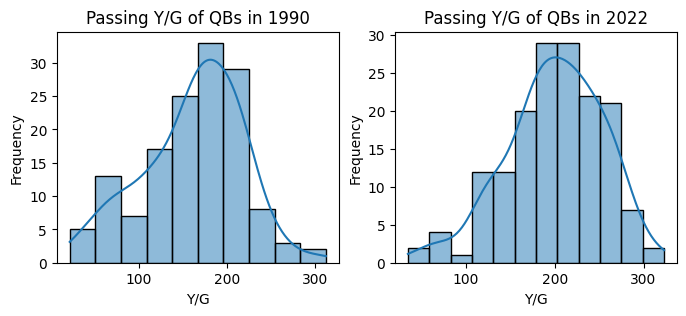

In [217]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

passing1990 = pd.read_csv("playerstats1990.csv")
passing1991 = pd.read_csv("playerstats1991.csv")
passing1992 = pd.read_csv("playerstats1992.csv")

passing1990s = pd.concat([passing1990, passing1991, passing1992], ignore_index=True)


passing2022 = pd.read_csv("playerstats2022.csv")
passing2023 = pd.read_csv("playerstats2023.csv")
passing2024 = pd.read_csv("playerstats2024.csv")

passing2020s = pd.concat([passing2022, passing2023, passing2024], ignore_index=True)


sns.histplot(passing1990s[passing1990s["Att"] > 60]["Y/G"], ax=axes[0], kde=True)
sns.histplot(passing2020s[passing2020s["Att"] > 60]["Y/G"], ax=axes[1], kde=True)
axes[0].set_title("Passing Y/G of QBs in 1990")
axes[1].set_title("Passing Y/G of QBs in 2022")
axes[0].set_ylabel("Frequency")
axes[1].set_ylabel("Frequency")


**A two sample, one-sided t-test will be conducted using passing yards per game (Y/G) to determine if there is evidence showing that passing has evolved between two different eras.**

**Ho:** The mean passing yards per game (Y/G) for QBs in the 1990s is equal to the mean passing yards per game for QBs in the 2020s.  μ₁ = μ₂
**Ha:** The mean passing yards per game (Y/G) for QBs in the 1990s is less than the mean passing yards per game for QBs in the 2020s.  μ₁ < μ₂


In [220]:
sample1 = passing1990s[passing1990s["Att"] > 50].sample(40, random_state=43819048)
sample2 = passing2020s[passing2020s["Att"] > 50].sample(40, random_state=5012309)


print(sample1["Y/G"].mean())
print(sample2["Y/G"].mean())

tStatistic, pValue = stats.ttest_ind(sample1["Y/G"], sample2["Y/G"], equal_var=False, alternative="less")


print(f"T-Statistic: {tStatistic}")
print(f"p-Value: {pValue}")

156.91000000000003
196.60250000000002
T-Statistic: -3.252398589060368
p-Value: 0.0008557119705283694


The p-value returned by the test is 0.08%, which is less than our significance level of 5%, demonstrating that there is evidence to show that passing has become more prevalent in today's era compared to the 1990s. 

## Is there a correlation between PPR Fantasy Points in a player's rookie year and Combine/Physical Stats?

0.09308828888396807
-0.2091674790963859
0.2802965137065999
-0.2218740721490704
0.18743363541512925


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     fantasy_points_ppr   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     5.436
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           0.000154
Time:                        09:52:11   Log-Likelihood:                -689.21
No. Observations:                 125   AIC:                             1390.
Df Residuals:                     119   BIC:                             1407.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    317.7021    380.590      0.835      0.406    -435.904    1071.308
shuttle     -126.5204     56.154     -2.253      0.026    -237.712     -15.329
vertical       5.7395      3.037      1.890      0.061      -0.275      11.754
forty        -34.0181     61.443     -0.554      0.581    -155.681      87.644
broad_jump     0.7286      1.401      0.520      0.604      -2.046       3.503
cone          18.3670     38.576      0.476      0.635     -58.017      94.751
==============================================================================
Omnibus:                       39.948   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.055
Skew:                           1.420   Prob(JB):                     8.30e-17
Kurtosis:                       5.481   Cond. No.                     9.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

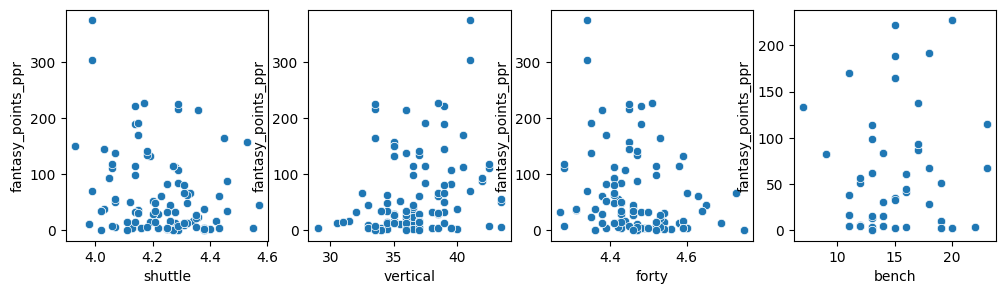

In [101]:
from statsmodels.formula.api import ols

pd.options.mode.chained_assignment = None  

rookieWrs2019 = dataFrameCreation(2019, "WR")
rookieWrs2020 = dataFrameCreation(2020, "WR")
rookieWrs2021 = dataFrameCreation(2021, "WR")
rookieWrs2022 = dataFrameCreation(2022, "WR")
rookieWrs2023 = dataFrameCreation(2023, "WR")
rookieWrs2024 = dataFrameCreation(2024, "WR")


allWrs = pd.concat(
    [rookieWrs2019, rookieWrs2020, rookieWrs2021, rookieWrs2022, rookieWrs2023, rookieWrs2024],
    ignore_index=True
)
fig, axes = plt.subplots(1, 4, figsize=(12,3))
sns.scatterplot(data=allWrs, x="shuttle", y="fantasy_points_ppr", ax=axes[0])
sns.scatterplot(data=allWrs, x="vertical", y="fantasy_points_ppr", ax=axes[1])
sns.scatterplot(data=allWrs, x="forty", y="fantasy_points_ppr", ax=axes[2])
sns.scatterplot(data=allWrs, x="bench", y="fantasy_points_ppr", ax=axes[3])

print(allWrs["fantasy_points_ppr"].corr(allWrs["bench"]))
print(allWrs["fantasy_points_ppr"].corr(allWrs["forty"]))
print(allWrs["fantasy_points_ppr"].corr(allWrs["vertical"]))
print(allWrs["fantasy_points_ppr"].corr(allWrs["shuttle"]))
print(allWrs["fantasy_points_ppr"].corr(allWrs["broad_jump"]))

OLS = ols(formula="fantasy_points_ppr ~ shuttle + vertical + forty + broad_jump + cone", data=allWrs)
model = OLS.fit()
model.summary()